# Section 16.7

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

train_size = 0.75
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=train_size, random_state=42)

In [3]:
X_train.shape

(52500, 28, 28)

In [4]:
y_train.shape

(52500,)

In [5]:
X_test.shape

(17500, 28, 28)

In [6]:
y_test.shape

(17500,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

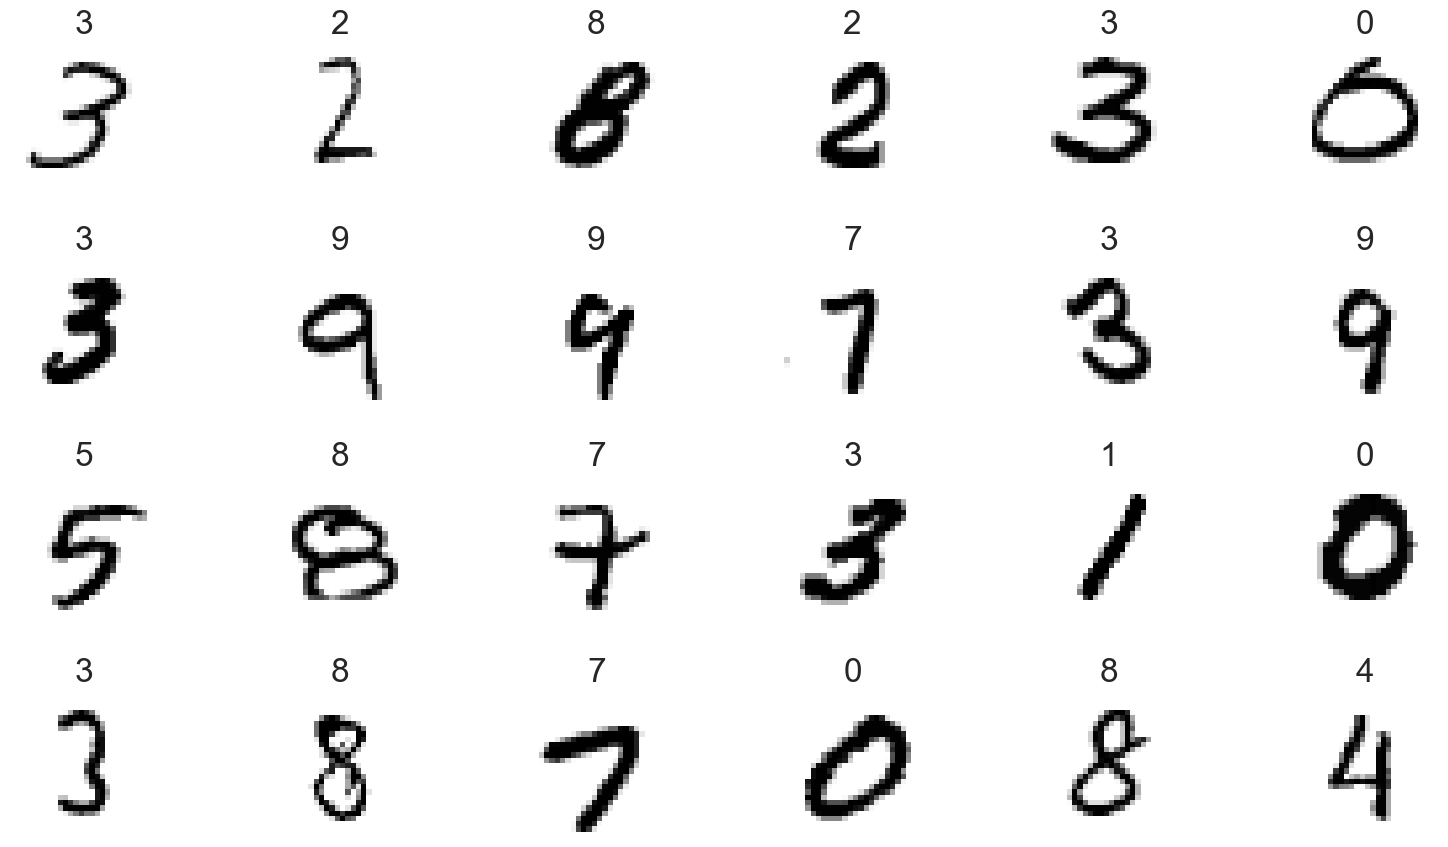

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [12]:
x_train_shape = X_train.shape[0]
X_train = X_train.reshape((x_train_shape, 28, 28, 1)) 

In [13]:
X_train.shape

(52500, 28, 28, 1)

In [14]:
X_train = X_train.astype('float32') / 255

In [15]:
x_test_shape = X_test.shape[0]
X_test = X_test.reshape((x_test_shape, 28, 28, 1))

In [16]:
X_test.shape

(17500, 28, 28, 1)

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(52500, 10)

In [21]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(17500, 10)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
cnn = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Flatten())

In [32]:
cnn.add(Dense(units=128, activation='relu'))

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [35]:
# # !pip install pydot
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image
# plot_model(cnn, to_file='convnet.png', show_shapes=True, 
#            show_layer_names=True)
# Image(filename='convnet.png') 

In [36]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
739/739 [==============================] - 23s 30ms/step - loss: 0.1512 - accuracy: 0.9549 - val_loss: 0.0542 - val_accuracy: 0.9827
Epoch 2/5
739/739 [==============================] - 34s 46ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 3/5
739/739 [==============================] - 37s 50ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 4/5
739/739 [==============================] - 41s 55ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0276 - val_accuracy: 0.9930
Epoch 5/5
739/739 [==============================] - 44s 59ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0398 - val_accuracy: 0.9891


In [38]:
loss, accuracy = cnn.evaluate(X_test, y_test)

547/547 [==============================] - 6s 12ms/step - loss: 0.0440 - accuracy: 0.9873


In [39]:
loss

0.044039782136678696

In [40]:
accuracy

0.9872571229934692

In [41]:
predictions = cnn.predict(X_test)

547/547 [==============================] - 7s 13ms/step


In [42]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [43]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000000002%
2: 0.0000020329%
3: 0.0000135853%
4: 0.0000000000%
5: 0.0000000641%
6: 0.0000000000%
7: 0.0000000000%
8: 99.9999880791%
9: 0.0000002259%


In [44]:
images = X_test.reshape((x_test_shape, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [45]:
len(incorrect_predictions)

223

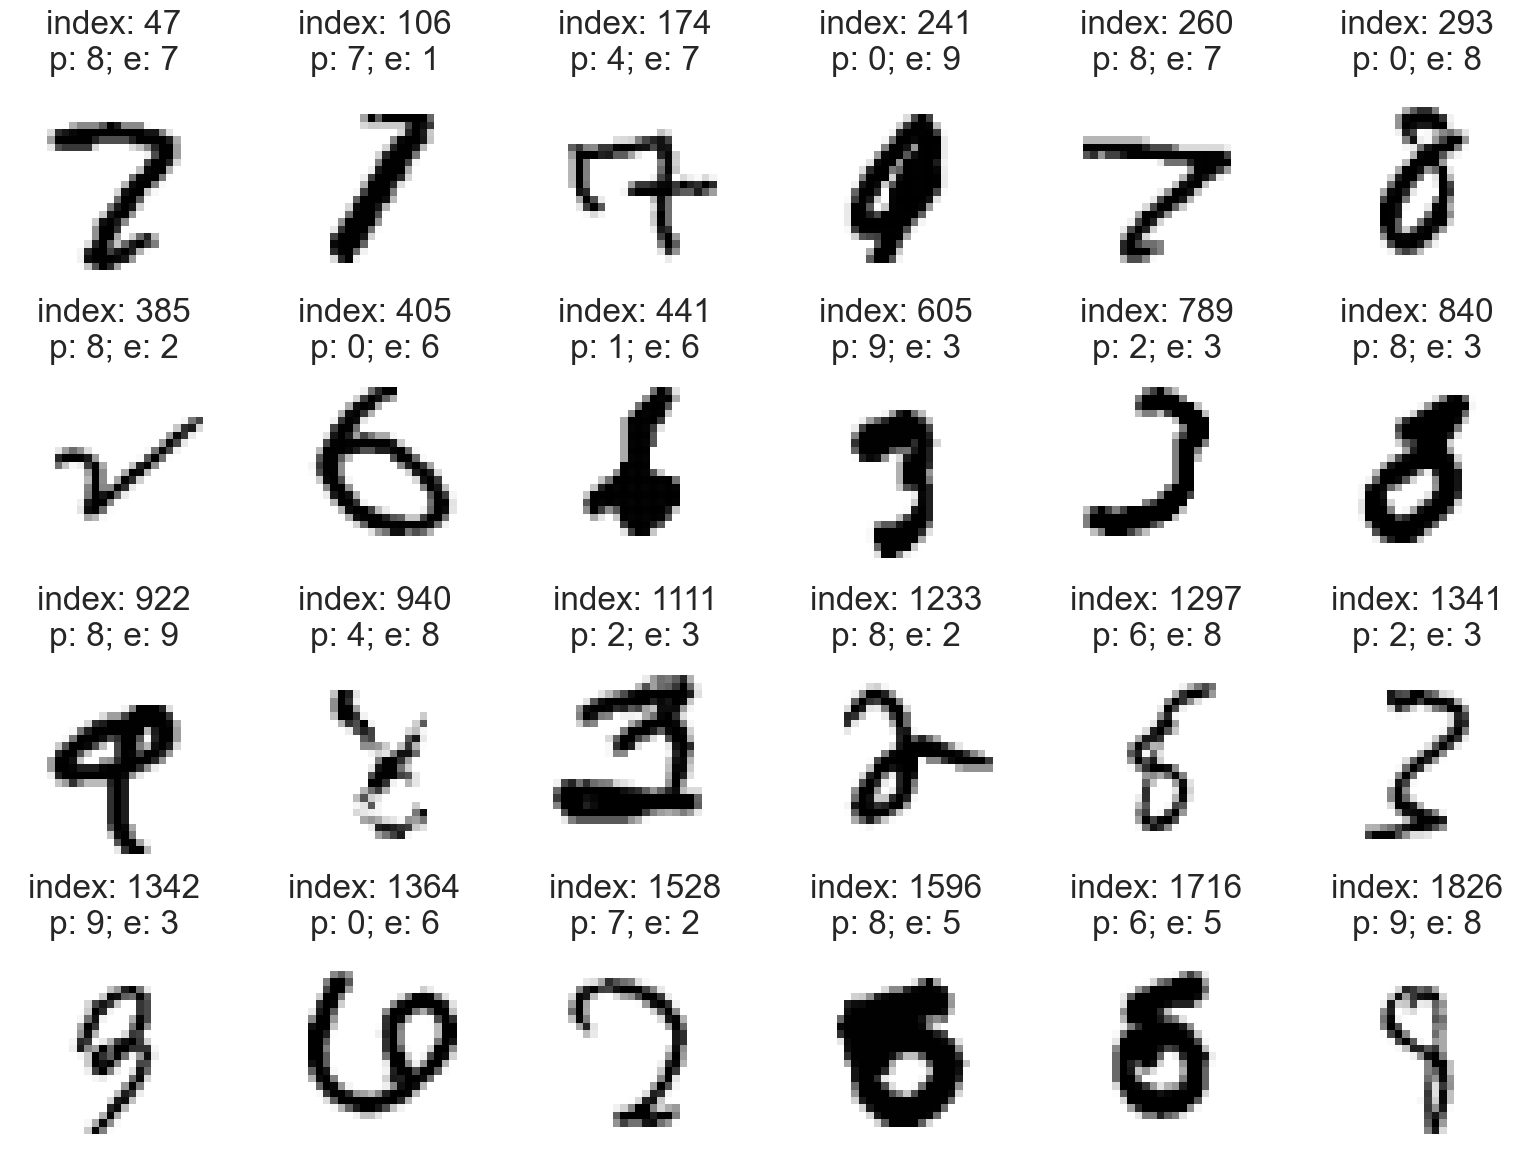

In [46]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [47]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [48]:
display_probabilities(predictions[495])

0: 0.0024707684%
1: 0.0000039988%
2: 99.9949693680%
3: 0.0000251558%
4: 0.0025054756%
5: 0.0000000001%
6: 0.0000223279%
7: 0.0000010413%
8: 0.0000013765%
9: 0.0000000128%


In [49]:
display_probabilities(predictions[583])

0: 0.0000004164%
1: 0.0000000000%
2: 0.0000000050%
3: 0.0000001848%
4: 0.0002166182%
5: 0.0003837392%
6: 0.0000000004%
7: 0.0000001930%
8: 0.0010372507%
9: 99.9983668327%


In [50]:
display_probabilities(predictions[625])

0: 0.0000316351%
1: 0.0000000025%
2: 0.0000080935%
3: 0.0000016797%
4: 0.0001242957%
5: 0.0000000032%
6: 0.0000001822%
7: 0.0000002150%
8: 0.0038093087%
9: 99.9960184097%


In [51]:
cnn.save('mnist_cnn_75.h5')